# Cognitive and Neural Dynamics Lab Tutorials
## Event Related Potentials (ERP)

##### Torben Noto 2015



In this notebook we're going to talk about how to calculate the **event related potential (ERP)** on some ECoG data.

The basic idea of an ERP is to look at how the electrical activity of a participant's brain changes when you present a stimulus.

Because the signal is **very** noisy, you will take the average brain activity across a time window of many trials.

Let's say you are running an experiment where you want to see how people's brains respond to sentances with expected words (I take coffee with cream and **sugar**) vs. sentances with unexpected words (I take coffee with cream and **dog**)


So we get a participant and put some electrodes on his head.  We show him 10 sentences with expected words and 10 sentences with unexpected words.  
This is actually a famous ERP experiment that Marta Kutas, the chair of the CogSci Department here at UCSD, did.

This tutorial will tell you how to analyze the data in an experiment like this in this experiment and calculate a result.


Here's how we do it:


In [1]:
#helpful settings
%config InlineBackend.figure_format = 'retina'
%pylab inline

#Loading all of the helpful modules
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import scipy.io
import scipy.signal

Populating the interactive namespace from numpy and matplotlib


In [7]:
#loading ECoG data
filename = 'emodat.mat'
filename = os.path.join('./', filename)
data = sp.io.loadmat(filename)
srate = data['srate'] # sampling rate
srate = srate[0][0];
data = data['data'] # time series
data = data[0, :]
print "There are " + str(len(data)) + "samples in this data"
print "The sampling rate is " + str(srate)

There are 1476035samples in this data
The sampling rate is 1017.25333333


#### Step 1:
Let's start simple and look at the data surround 1 event

ECoG data ~500 ms before and ~1000 ms after an event


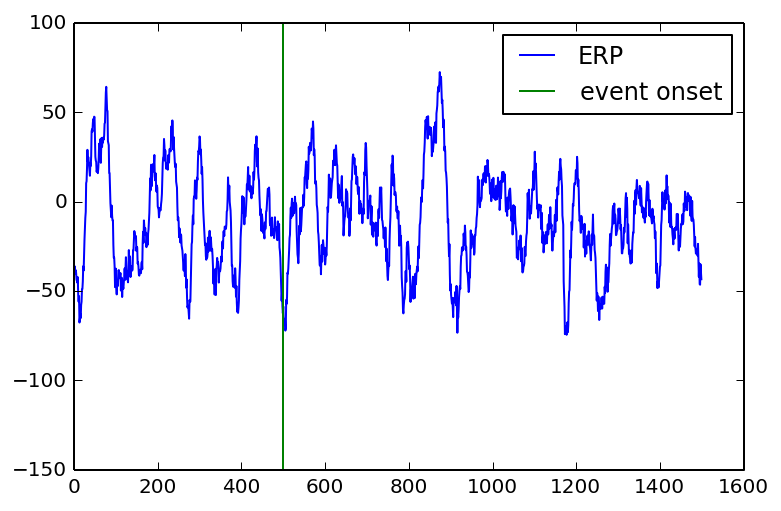

In [5]:
event_inds = [1034, 2133, 4681, 9960, 12574] #Time indicies when a stimulus is presented to the subject
this_event = event_inds[0]
timewin = [500, 1000] #500 samples before and 1000 samples after. Remember this: The units here are samples, not milliseconds. 
#We sampled at 1017.253 samples per second so we'll looking at about a second and a half of data.


my_ERP = data[this_event-timewin[0]:this_event + timewin[1]]

plot(my_ERP,label = 'ERP')
plot([500,500], [-150, 100],label = 'event onset')
legend()

print 'ECoG data ~500 ms before and ~1000 ms after an event'

This really doesn't tell us much about what someone's brain is doing. We have no idea how much of the change in voltage is caused by the **event** compared to **other random ongoing brain activity** and there is no reliability that we will see this in the other stimulus presentations.

We can do better by looking at multiple events 
(and eventually multiple channels and participants) involved in our analysis.

Now let's do a much more robust method of computing ERP:

(1500,)


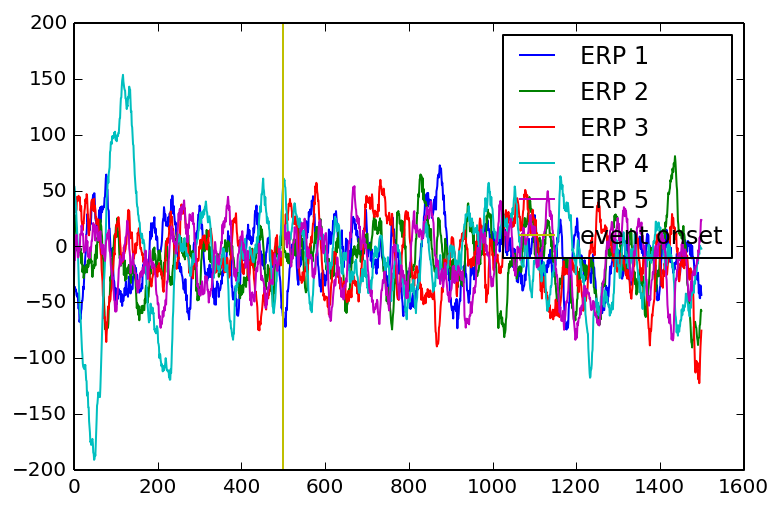

In [6]:
#Let's look at ERP's of 5 events next to eachother

for event in range(len(event_inds)):
    this_ERP = data[event_inds[event]-timewin[0]:event_inds[event] + timewin[1]]
    plot(this_ERP,label = 'ERP ' +str(event+1))

plot([500,500], [-200, 200],label = 'event onset')    
legend()
print my_ERP.shape

What a mess.

I don't know how you could draw any meaningful conclusions from data if we visualize it this way.

Here's how we're going to clean up this data matrix to make a basic ERP:
1. We'll **normalize** all of the events to the same baseline and
2. We'll calculate the voltage for the **average** trial


[ -5.27431592 -14.45248451 -27.37377517   2.44753003 -22.96190022]


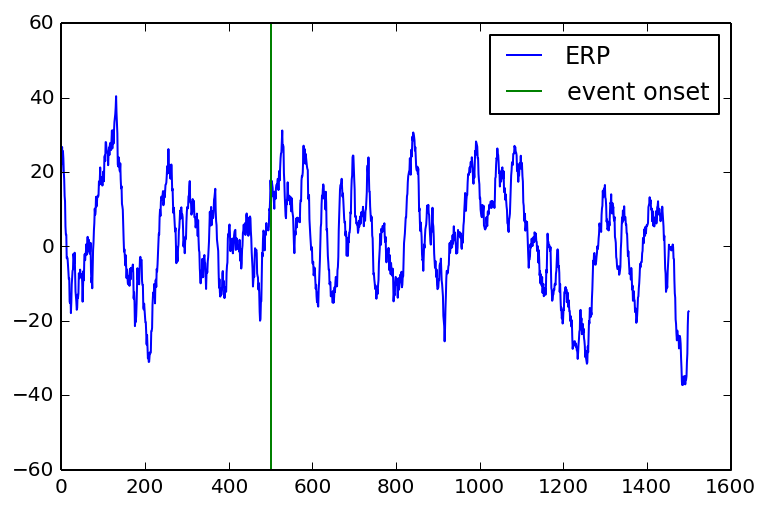

In [7]:
chan_baselines = zeros(len(event_inds)); #We're going to get a baseline ERP data before we analyze any of the data.
ERP_matrix = zeros((len(event_inds),timewin[0]+timewin[1])); #We're making a matrix that will hold all the trials. We will get the mean from this.

for event in range(len(event_inds)):
    chan_baselines[event] = mean(data[event_inds[event]-100:event_inds[event] + 0]) 
    ERP_baseline_removed = data[event_inds[event]-timewin[0]:event_inds[event] + timewin[1]] - chan_baselines[event] #subtracting baseline from each trial.    
    ERP_matrix[event,:] = ERP_baseline_removed;
    
mean_ERP = mean(ERP_matrix,0) #taking the mean voltage across trials.
print chan_baselines #see why it's important to remove baseline?

#plotting
plot(mean_ERP, label = 'ERP');
plot([500,500], [-60, 60],label = 'event onset');
legend()




This is just a a basic example of an ERP. This plot represents the average signal across 5 events for one electrode.

A typical ERP has features that are indicitive of cognitive processes (such as the P1, N2 etc.). You don't see any of those here because this ERP is calculated on sham events. It also looks 'noisier' because it is done on ECoG data where the frequency resolution is much higher.

Make sure that you understand every step of the simple introductory code above.

That's it! In Summary here's what we learned:
1.  You can look at the time window surrounding a single event or multiple events to see what is going on. By the way, an event in an ERP doesn't have to be a stimulus presentation. An ERP can be calculated using any timepoints that might be interesting
2. If you want an accurate ERP, you have to subtract out the baseline noise
3. You can also look at ERP's as a percent increase from baseline if you want. 
4. Think hard about what this signal means physiologically and what taking the mean of lots of trials tells you as well. What does it mean that the average amplitudes are higher or lower after an event?